In [1]:
from src.time_base_seconds import TimeUnits
from src.odes import init_odes
from src.experiment import Experiment
from src.integrator import init_integrator
from src.tools import timer
import matplotlib.pyplot as plt
import numpy as np

## Experiment Variables

In [2]:
Experiment.Variables.TEMP_NIGHT_NOMINAL = 15
Experiment.Variables.TEMP_DAY_NOMINAL = 22
Experiment.Variables.EXPERIMENT_DURATION = 2*TimeUnits.day
Experiment.Variables.INTEGRATOR_PRECISION = 0.2 # > 0, measured in minutes, where lower equals higher precision, and takes longer to solve

## Initialize Parts

In [3]:
RADIOR_TYPES = dict(water=False, electric=True)
init_odes(water_radiator_or_electric_radiator=RADIOR_TYPES['water'])
init_integrator()

## Solver

In [ ]:
with timer() as f:  # Takes about 4 minutes to finish...
    results = Experiment.integrator.solve(debug=False)

# Results

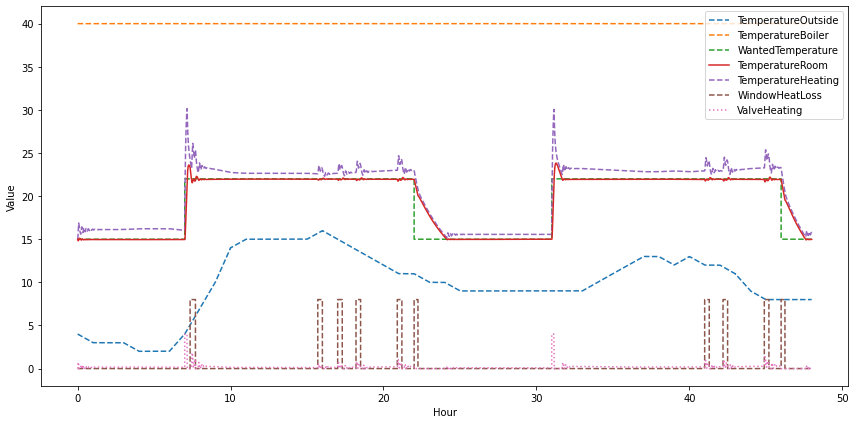

In [8]:
num = int(TimeUnits.hour) * 24
if results is not None:
    plt.figure(figsize=(12, 6))
    plt.plot(results['t']/3600, results['env'], '--', label='TemperatureOutside')
    plt.plot(results['t']/3600, results['boiler'], '--', label='TemperatureBoiler')
    plt.plot(results['t']/3600, results['wanted'], '--', label='WantedTemperature')
    plt.plot(results['t']/3600, results['room'], '-', label='TemperatureRoom', zorder=10)
    plt.plot(results['t']/3600, results['radiator'], '--', label='TemperatureHeating')
    plt.plot(results['t']/3600, results['window'] * 8, '--', label='WindowHeatLoss')
    plt.plot(results['t']/3600, results['opening'] * 4, ':', label='ValveHeating')
    #plt.xlim(0, 24*2)
    #plt.xticks(range(0, 25*2, 2))
    plt.yticks(range(0, 45, 5))
    plt.xlabel("Hour")
    plt.ylabel("Value")
    plt.legend(loc="upper right")
    plt.tight_layout()
    plt.show()

# Format and export the results

In [9]:
data = [
    *zip(
        results['t']/3600,
        results['env'], 
        results['boiler'],
        results['wanted'],
        results['room'],
        results['radiator'],
        results['window']*7,
        results['opening']*3,
    )
]
with open('gnuplot/data.dat', 'w') as f:
    for _ in data:
        f.write(('{} '*len(_)).format(*_))
        f.write('\n')

# Gnuplot

In [ ]:
!gnuplot gnuplot/script.gp